In [110]:
import numpy as np
import matplotlib.pyplot as plt
import lysis
import re
import os
import scipy.stats

In [2]:
e = lysis.util.Experiment(os.path.join("..", "..", "data"), experiment_code='2023-01-18-1700')
e.read_file()
print(e)

experiment_code : 2023-01-18-1700
data_filenames  : unbinding_time    : tsectPA.dat
                  lysis_time        : lysismat.dat
                  total_lyses       : lenlysisvect.dat
                  degradation_state : deg.dat
micro_params    : None
macro_params    : binding_rate       : 0.1
                  pore_size          : 0.00010135
                  diffusion_coeff    : 5e-07
                  binding_sites      : 427
                  forced_unbind      : 0.0852
                  average_bind_time  : 27.8
                  grid_node_distance : 1.0862
                  cols               : 9
                  rows               : 12
                  full_row           : 26
                  xz_row             : 17
                  total_edges        : 303
                  total_fibers       : 225
                  empty_rows         : 3
                  last_empty_edge    : 77
                  total_molecules    : 430
                  moving_probability : 0.2
  

In [98]:
n = np.fromfile(os.path.join(e.os_path, "m_bind_t.f-array.dat"), dtype=np.float_)

In [101]:
n = n.reshape(75823498, 3).T

In [100]:
n.size / 3

75823498.0

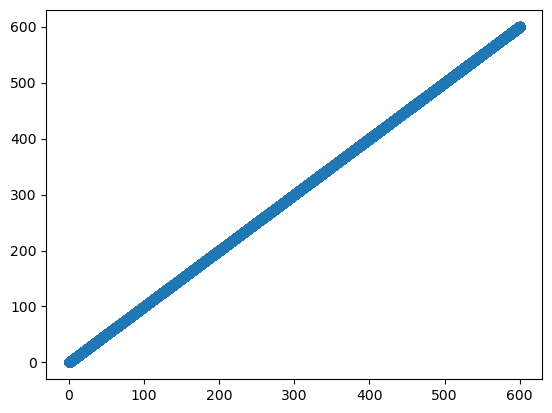

In [33]:
plt.scatter(n[1], n[2])

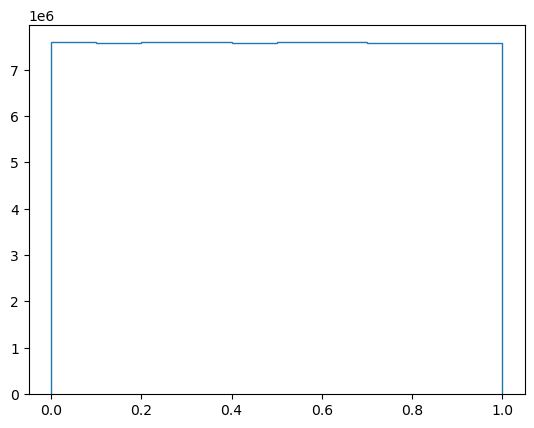

In [102]:
counts, bins = np.histogram(n[0])
plt.stairs(counts, bins)

In [88]:
rands = np.empty((100,3440), dtype=np.float_)
for i in range(100):
    rands[i] = np.fromfile(os.path.join(e.os_path, f"random{i+1:03}.f-array.dat"), dtype=np.float_)

In [85]:
rand = np.fromfile(os.path.join(e.os_path, "random001.f-array.dat"), dtype=np.float_)
rand.size

3440

In [89]:
rands

array([[0.34371783, 0.07755252, 0.81315746, ..., 0.39817703, 0.58313772,
        0.93758119],
       [0.80713772, 0.63505224, 0.73369301, ..., 0.55141526, 0.83448601,
        0.76164542],
       [0.69218079, 0.38035831, 0.74877784, ..., 0.60531417, 0.88263337,
        0.04972118],
       ...,
       [0.10015076, 0.00211892, 0.26010383, ..., 0.86858483, 0.74989966,
        0.36444236],
       [0.13730693, 0.76785972, 0.44646398, ..., 0.71179792, 0.84326439,
        0.09655665],
       [0.44470357, 0.63497132, 0.3353359 , ..., 0.65594208, 0.58749986,
        0.44117791]])

In [82]:
np.count_nonzero(n5[0] < 0.8)

3128

In [104]:
pattern = re.compile(r"Last fiber degraded at:\s*(\d+\.\d*)\s*sec")

In [119]:
normal_degrade_times = []
with open(os.path.join(e.os_path, "macro-normal.txt"), 'r') as file:
    normal_degrade_times = re.findall(pattern, file.read())
normal_degrade_times = [float(i) for i in normal_degrade_times]
normal_degrade_times, np.mean(normal_degrade_times), np.std(normal_degrade_times)

([328.36654013325,
  311.844656036083,
  305.266580907083,
  316.8795610315,
  342.1687880265,
  339.901454406667,
  331.47068489275,
  317.613653946167,
  315.032687346,
  294.148360233083,
  301.60022506275,
  311.27422749325,
  325.47604928175,
  284.567831387333,
  335.23017192775,
  314.254767988667,
  340.547209647833,
  302.577760170667,
  323.311776281,
  318.460736908333],
 317.9996861554208,
 15.33820699718757)

In [122]:
array_degrade_times = []
with open(os.path.join(e.os_path, "macro-array.txt"), 'r') as file:
    array_degrade_times = re.findall(pattern, file.read())
array_degrade_times = [float(i) for i in array_degrade_times]
array_degrade_times, np.mean(array_degrade_times), np.std(array_degrade_times)

([305.502832824583,
  299.568116178167,
  309.757421704083,
  304.08806047225,
  330.050091841,
  310.627787463917,
  327.15446507825,
  328.395986024417,
  298.752191077583,
  338.264810688333,
  301.287619264667,
  319.712187282917,
  296.888197687917,
  298.4354765505,
  351.818138083,
  330.334278930167,
  323.045393684167,
  299.50271890825,
  297.877374194667,
  325.571234836917],
 314.83171913878766,
 15.756864066186335)

In [111]:
scipy.stats.ks_2samp(normal_degrade_times, array_degrade_times)

KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=323.774693081667, statistic_sign=-1)

In [116]:
scipy.stats.ks_2samp(normal_degrade_times, normal_degrade_times_2)

KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=333.301808450417, statistic_sign=1)

In [121]:
scipy.stats.ks_2samp(normal_degrade_times, array_degrade_times)

KstestResult(statistic=0.3, pvalue=0.33559098126008213, statistic_location=310.627787463917, statistic_sign=-1)